# A Naive Implementation

1. Generate a random number within the desired range and check if it is unique and if it is then add it to the results.
2. Repeat until the desired number of results have been generated

In [1]:
import random
from typing import Generator, List

def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")
    
    unique_numbers = set()

    while len(unique_numbers) < batch_size:
        number = random.randint(min_num, max_num)
        if number not in unique_numbers:
            unique_numbers.add(number)
            yield number

In [2]:
list(generate_unique_random_numbers(0, 9, 3))

[9, 7, 0]

We can run it multiple times and plot the results to convince ourselves that it is evenly distributed.

In [3]:
def run_and_collect_data(min_num: int, max_num: int, batch_size: int, iterations: int):
    all_results = []
    
    for _ in range(iterations):
        result = generate_unique_random_numbers(min_num, max_num, batch_size)
        all_results.append(result)
    
    return all_results

In [4]:
from scipy.stats import chisquare

def perform_chi_square_test(all_results: List[List[int]], min_num: int, max_num: int):
    # Flatten the list of lists into a single list
    all_numbers = [number for result in all_results for number in result]
    
    # Calculate observed frequencies
    observed_freq = [all_numbers.count(i) for i in range(min_num, max_num + 1)]
    
    # Expected frequency (assuming uniform distribution)
    expected_freq = [len(all_numbers) / (max_num - min_num + 1)] * (max_num - min_num + 1)
    
    # Perform chi-square test
    chi2, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    return chi2, p_value, observed_freq, expected_freq

In [5]:
import matplotlib.pyplot as plt

def plot_frequencies(observed_freq: List[int], expected_freq: List[float], min_num: int, max_num: int):
    numbers = list(range(min_num, max_num + 1))
    
    plt.bar(numbers, observed_freq, color='blue', alpha=0.7, label='Observed')
    plt.plot(numbers, expected_freq, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Expected')
    
    plt.title('Observed vs Expected Frequencies of Random Numbers')
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Chi-Square Statistic: 3.06
P-Value: 0.9618685402618374


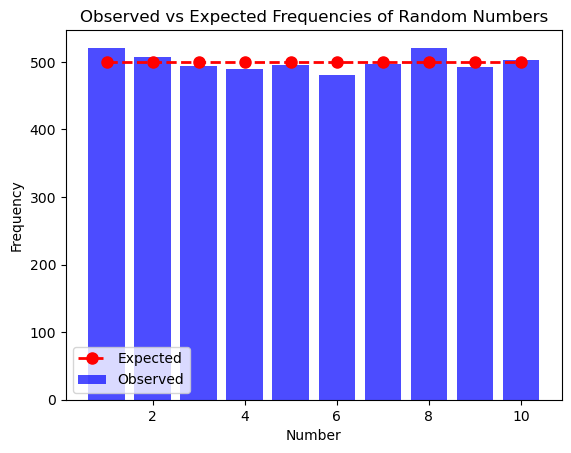

In [6]:
min_num = 1
max_num = 10
batch_size = 5
iterations = 1000  # Increase this number for better confidence

# Generate the data
all_results = run_and_collect_data(min_num, max_num, batch_size, iterations)

# Perform chi-square test
chi2, p_value, observed_freq, expected_freq = perform_chi_square_test(all_results, min_num, max_num)

# Print the chi-square test results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

# Plot observed vs expected frequencies
plot_frequencies(observed_freq, expected_freq, min_num, max_num)

It is fast even if the range is large.

In [7]:
list(generate_unique_random_numbers(0, 10**100, 3))

[4943618706768752664708041466740730773124940728911208263646179537774893232983565355236520099345451296,
 4174139543356418726333843929524972391552787482810938495518648293834904610301856069118441425799418077,
 5578616855956201162593837442772130552565142359587625962009133892920708279622885328465583699450859853]

What happens if we want to generate a lot of unique random numbers?

In [8]:
def generate_and_print(min_num: int, max_num: int, batch_size: int):
    random_numbers_gen = generate_unique_random_numbers(min_num, max_num, batch_size)
    
    for _ in random_numbers_gen:
        pass

In [ ]:
%time generate_and_print(0, 10**100, 10**10)